# Libraries
Requires Python>=3.9.1\
and libraries in requirements.txt 

In [1]:
import pandas as pd 
import numpy as np 

from keras.utils import to_categorical


import matplotlib.pyplot as plt 
## below line works only in jupyter notebooks
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')


# Data

In [2]:
train_data_file = r'.\Data\train.csv'
test_data_file = r'Data\test.csv'

In [3]:
orig_train_df = pd.read_csv(train_data_file)
print(orig_train_df.shape)
orig_train_df

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
orig_test_df = pd.read_csv(test_data_file)
print(orig_test_df.shape)
orig_test_df

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
orig_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
# check for any column its unique values
orig_train_df['pixel143'].unique() 

array([  0,  36, 148,  58, 117, 161,  11,  28,  10,  13,  12,  80,  23,
        71,  18,  50,   5,   2,  25,  22,  31,  42,   4, 171,  86,  55,
        77,  57,   7,  75,  40,  67, 255])

In [7]:
x_train = (orig_train_df.iloc[:,1:].values).astype('float32')
y_train = (orig_train_df.iloc[:,0].values).astype('int32')
x_test = orig_test_df.values.astype('float32')
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
x_train.size

32928000

In [9]:
y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int32)

The target variable has values from 0 to 9 total 10 unique values.\
Since this is not a continuous data and it has more than 2 descrete values.\
This is a **Multi class classification** problem.

# Data Visulalization
Lets look at the data we have collected so far. We have the following data:

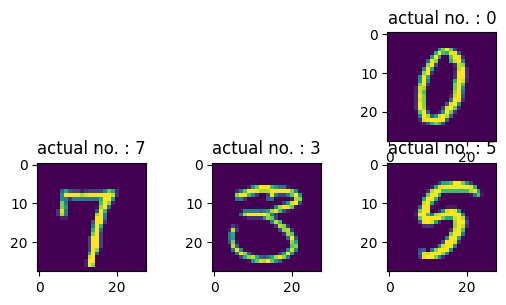

In [10]:
# Convert train dataset to (num_images, img_rows, img_cols) format
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols)

for i in range( 5, 9):
    plt.subplot(330+ (i+1))
    plt.imshow(x_train[i])
    plt.title(f'actual no. : {y_train[i]}')

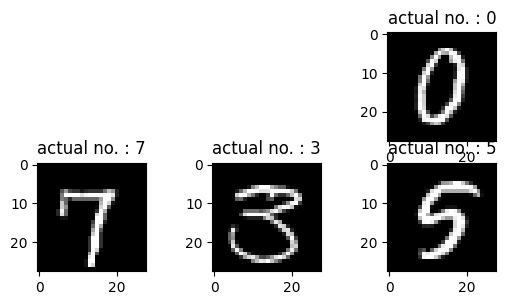

In [11]:
# Convert train dataset to (num_images, img_rows, img_cols) format
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols)

for i in range( 5, 9):
    plt.subplot(330+ (i+1))
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(f'actual no. : {y_train[i]}')

In [12]:
# expand 1 more dimension as 1 for colour channel - gray
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_train.shape

(42000, 28, 28, 1)

In [13]:
x_test = x_test.reshape(x_test.shape[0], 28,28, 1)
x_test.shape

(28000, 28, 28, 1)

# Pre processing the digit images
## Feature Standardization
Here we center the data around zero mean and unit variance.

In [14]:
mean_x = x_train.mean().astype(np.float32)
std_x = x_train.std().astype(np.float32)
mean_x, std_x


(np.float32(33.408936), np.float32(78.67759))

In [15]:
def standardize(x):
    return (x-mean_x)/std_x 

## One hot encoding
One-hot encoding is a technique used to convert categorical variables into numerical variables. \
It is a way to replace 0 to 9 , with its equivalent 1 when it corresponding value is true

For example 2, would be [0,0,1,0,0,0,0,0,0,0]

In [16]:
y_train.shape, y_train

((42000,), array([1, 0, 1, ..., 7, 6, 9], dtype=int32))

In [17]:
y_train = to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes, y_train

(10,
 array([[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]]))

In [18]:
y_train.shape

(42000, 10)

Lets plot randomly from ytrain

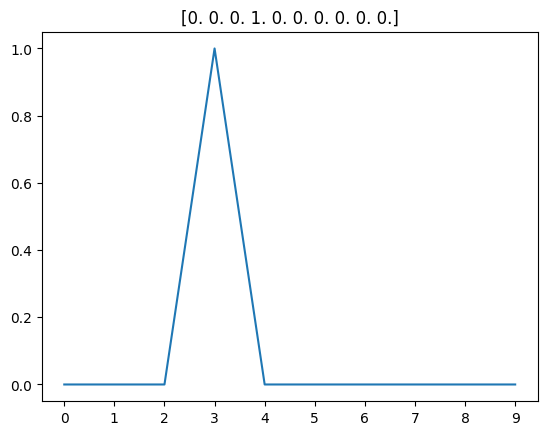

In [19]:
plt.title(y_train[9])
plt.plot(y_train[9])
plt.xticks(range(10))
plt.show()

Ohh ho its 3!

# Designing Neural Network Architecture

In [20]:
# Set the random seed, for reproducability

seed = 143
np.random.seed(seed)

epochs = 10

## Linear Model

In [21]:
from keras.models import Sequential
from tensorflow.keras.layers import Lambda, Dense, Flatten, Dropout #from keras.layers.B # import Lambda, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D, MaxPooling2D

Lets create a simple model from Keras Sequential layer.\
1. Lambda layer performs simple arithmetic operations like sum, average, exponentiation, etc.\
In 1st layer of the model we have to define input dimensions of our data in (rows, columns, colour channel) format. (in theano colour channel comes first).
2. Flatten will transform input into 1D array.
3. Dense is fully connected layer that means all neurons in previous layers will be connected to all neurons in fully connected layer.\
In the last layer we have to specify output dimensions/classes of the model. Here it's 10, since we have to output 10 different digit labels.

In [22]:
model = Sequential()
model.add(
    Lambda(standardize, input_shape=(28,28,1))
)
model.add(
    Flatten()
)
model.add(Dense(10, activation='softmax'))

print(f'input shape: {model.input_shape}')
print(f'output shape: {model.output_shape}')



input shape: (None, 28, 28, 1)
output shape: (None, 10)


## Compile Network
Before making network ready for training we have to make sure to add below things:
1. A loss function: to measure how good the network is.
2. An optimizer: to update network as it sees more dta and reduce loss value
3. Metrics: to monitor performance of network

In [23]:
from keras.optimizers import RMSprop

model.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator
gen = ImageDataGenerator()

## Cross validation

In [25]:
from sklearn.model_selection import train_test_split

x = x_train
y = y_train
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train,
    test_size=0.2,
    random_state=seed
)

batches = gen.flow(x_train, y_train, batch_size=64)
val_batches = gen.flow(x_val, y_val, batch_size=64)

In [26]:
history = model.fit(
    x=batches,
    steps_per_epoch=batches.n,
    epochs=10,
    validation_data=val_batches,
    validation_steps=val_batches.n
)

Epoch 1/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 4s 93us/step - accuracy: 0.8630 - loss: 0.4585 - val_accuracy: 0.9136 - val_loss: 0.3129
Epoch 2/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 3s 92us/step - accuracy: 0.9112 - loss: 0.3105 - val_accuracy: 0.9204 - val_loss: 0.2930
Epoch 3/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 3s 90us/step - accuracy: 0.9164 - loss: 0.2917 - val_accuracy: 0.9199 - val_loss: 0.2901
Epoch 4/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 3s 85us/step - accuracy: 0.9183 - loss: 0.2830 - val_accuracy: 0.9225 - val_loss: 0.2825
Epoch 5/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 3s 86us/step - accuracy: 0.9223 - loss: 0.2759 - val_accuracy: 0.9263 - val_loss: 0.2720
Epoch 6/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 3s 94us/step - accuracy: 0.9242 - loss: 0.2698 - val_accuracy: 0.9279 - val_loss: 0.2737
Epoch 7/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 3s 97us/step - accuracy: 0.9253 - loss: 0.2663 - val_accuracy: 0.9257 - val_loss: 0.2765
Epoch 8/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 3s 86us/step - accuracy: 

In [27]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

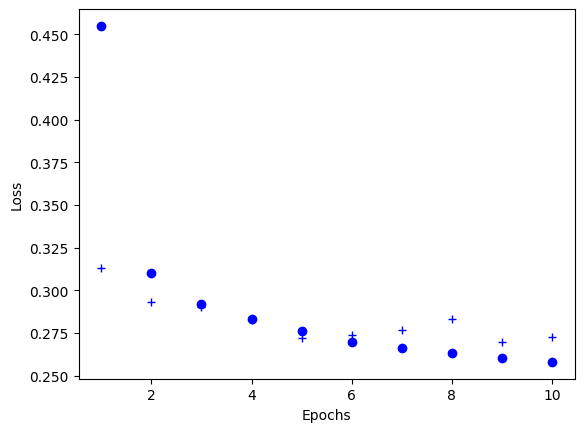

In [34]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = list(range(1, len(loss_values)+1))


# 'bo' is for 'blue dot'
plt.plot(epochs, loss_values, 'bo')
# b+ is for 'blue crosses' 
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

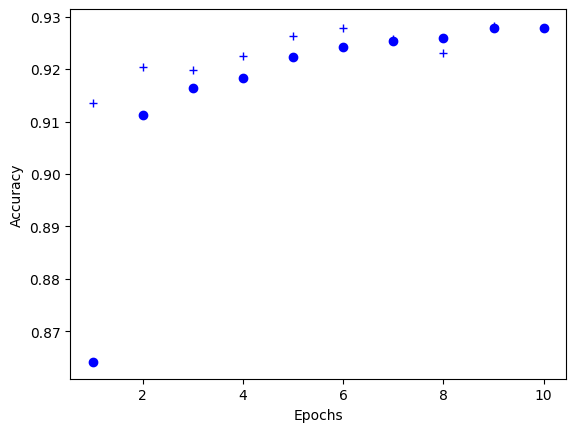

In [35]:
plt.clf()

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Fully Connected Model

In [36]:
def get_fc_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
    ]      
    )
    model.compile(
        optimizer='Adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [37]:
fc = get_fc_model()
fc.optimizer.learning_rate = 0.001

In [39]:
epochs=10

In [40]:
history = fc.fit(
    x=batches,
    steps_per_epoch=batches.n,
    epochs=epochs,
    validation_data=val_batches,
    validation_steps=val_batches.n
)

Epoch 1/10


33600/33600 ━━━━━━━━━━━━━━━━━━━━ 3s 80us/step - accuracy: 0.9275 - loss: 0.2426 - val_accuracy: 0.9620 - val_loss: 0.1247
Epoch 2/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 3s 77us/step - accuracy: 0.9711 - loss: 0.0968 - val_accuracy: 0.9677 - val_loss: 0.1065
Epoch 3/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 3s 89us/step - accuracy: 0.9806 - loss: 0.0615 - val_accuracy: 0.9699 - val_loss: 0.1004
Epoch 4/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 3s 91us/step - accuracy: 0.9876 - loss: 0.0393 - val_accuracy: 0.9737 - val_loss: 0.0894
Epoch 5/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 3s 88us/step - accuracy: 0.9905 - loss: 0.0293 - val_accuracy: 0.9715 - val_loss: 0.1078
Epoch 6/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 3s 75us/step - accuracy: 0.9917 - loss: 0.0257 - val_accuracy: 0.9639 - val_loss: 0.1446
Epoch 7/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 2s 71us/step - accuracy: 0.9923 - loss: 0.0226 - val_accuracy: 0.9668 - val_loss: 0.1337
Epoch 8/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 3s 77us/step - accuracy: 0.9937 - lo

## Convolution Neural Network
CNNS are extremely efficient for images

In [41]:
from keras.layers import Convolution2D, MaxPooling2D

def get_cnn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32, (3, 3), activation='relu'), 
        Convolution2D(32, (3,3), activation='relu'),
        MaxPooling2D(),
        Convolution2D(64, (3,3), activation='relu'),
        Convolution2D(64, (3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

    

In [42]:
model = get_cnn_model()
model.optimizer.learning_rate=0.001

In [43]:
history = model.fit(
    x=batches,
    steps_per_epoch=batches.n,
    epochs=epochs,
    validation_data=val_batches,
    validation_steps=val_batches.n    
)

Epoch 1/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 7s 166us/step - accuracy: 0.9496 - loss: 0.1591 - val_accuracy: 0.9810 - val_loss: 0.0638
Epoch 2/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 5s 158us/step - accuracy: 0.9858 - loss: 0.0454 - val_accuracy: 0.9901 - val_loss: 0.0354
Epoch 3/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 5s 155us/step - accuracy: 0.9907 - loss: 0.0293 - val_accuracy: 0.9873 - val_loss: 0.0504
Epoch 4/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 5s 154us/step - accuracy: 0.9933 - loss: 0.0212 - val_accuracy: 0.9898 - val_loss: 0.0355
Epoch 5/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 5s 154us/step - accuracy: 0.9940 - loss: 0.0178 - val_accuracy: 0.9894 - val_loss: 0.0340
Epoch 6/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 5s 153us/step - accuracy: 0.9952 - loss: 0.0144 - val_accuracy: 0.9899 - val_loss: 0.0407
Epoch 7/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 5s 157us/step - accuracy: 0.9961 - loss: 0.0121 - val_accuracy: 0.9881 - val_loss: 0.0427
Epoch 8/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 5s 154us/step - ac

## Data Augmentation
It is a technique of showing slightly different or new images to neural network to avoid overfitting. And to achieve better generalization.\
In case you have very small dataset, you can use different kinds of data augmentation techniques to increase you data size.\
Neural Networks perform bettery if you provide them more data.\
Different data augmentation techniques are as follows.
1. Cropping
2. Rotating
3. Scaling
4. Translating
5. Flipping
6. Adding Gaussian noise to input images etc.

In [44]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3, height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(x_train, y_train, batch_size=64)
val_batches = gen.flow(x_val, y_val, batch_size=64)                  

In [45]:
model.optimizer.learning_rate=0.001
history = model.fit(x=batches, steps_per_epoch=batches.n, epochs=epochs, validation_data=val_batches,validation_steps=val_batches.n)

Epoch 1/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 18s 529us/step - accuracy: 0.9806 - loss: 0.0617 - val_accuracy: 0.9858 - val_loss: 0.0469
Epoch 2/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 17s 500us/step - accuracy: 0.9894 - loss: 0.0363 - val_accuracy: 0.9880 - val_loss: 0.0462
Epoch 3/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 17s 495us/step - accuracy: 0.9901 - loss: 0.0308 - val_accuracy: 0.9894 - val_loss: 0.0407
Epoch 4/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 17s 505us/step - accuracy: 0.9914 - loss: 0.0263 - val_accuracy: 0.9894 - val_loss: 0.0352
Epoch 5/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 17s 513us/step - accuracy: 0.9925 - loss: 0.0239 - val_accuracy: 0.9883 - val_loss: 0.0444
Epoch 6/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 16s 485us/step - accuracy: 0.9930 - loss: 0.0230 - val_accuracy: 0.9882 - val_loss: 0.0395
Epoch 7/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 16s 482us/step - accuracy: 0.9933 - loss: 0.0209 - val_accuracy: 0.9885 - val_loss: 0.0414
Epoch 8/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 17s 516us/s

## Adding Batch Normalization
Batch normalization is a technique that normalizes the input to each layer, which helps to improve the stability\
To fine tune hyperparameters more better and train really deep neural networks.

In [46]:
from tensorflow.keras.layers import BatchNormalization
def get_bn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32, (3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32, (3,3), activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(64, (3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64, (3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
            ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [47]:
model = get_bn_model()
model.optimizer.learning_rate=0.001

In [48]:
history = model.fit(x=batches, steps_per_epoch=batches.n, epochs=epochs, validation_data=val_batches, validation_steps=val_batches.n)


Epoch 1/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 21s 516us/step - accuracy: 0.9447 - loss: 0.1786 - val_accuracy: 0.9700 - val_loss: 0.0906
Epoch 2/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 17s 512us/step - accuracy: 0.9784 - loss: 0.0706 - val_accuracy: 0.9837 - val_loss: 0.0545
Epoch 3/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 17s 514us/step - accuracy: 0.9837 - loss: 0.0523 - val_accuracy: 0.9818 - val_loss: 0.0599
Epoch 4/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 17s 514us/step - accuracy: 0.9871 - loss: 0.0428 - val_accuracy: 0.9823 - val_loss: 0.0593
Epoch 5/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 17s 516us/step - accuracy: 0.9874 - loss: 0.0410 - val_accuracy: 0.9861 - val_loss: 0.0480
Epoch 6/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 18s 519us/step - accuracy: 0.9878 - loss: 0.0383 - val_accuracy: 0.9855 - val_loss: 0.0470
Epoch 7/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 17s 510us/step - accuracy: 0.9886 - loss: 0.0355 - val_accuracy: 0.9863 - val_loss: 0.0510
Epoch 8/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 17s 506us/s

# Predict Test data
Make sure you use full train dataset here to train model and predict on test set.

In [49]:
model.optimizer.learning_rate=0.01
gen = ImageDataGenerator()
batches = gen.flow(x, y, batch_size=64)
history = model.fit(x=batches, steps_per_epoch=batches.n, epochs=epochs)


Epoch 1/10
42000/42000 ━━━━━━━━━━━━━━━━━━━━ 13s 309us/step - accuracy: 0.9723 - loss: 0.1082 
Epoch 2/10
42000/42000 ━━━━━━━━━━━━━━━━━━━━ 13s 308us/step - accuracy: 0.9876 - loss: 0.0410 
Epoch 3/10
42000/42000 ━━━━━━━━━━━━━━━━━━━━ 13s 304us/step - accuracy: 0.9888 - loss: 0.0373 
Epoch 4/10
42000/42000 ━━━━━━━━━━━━━━━━━━━━ 13s 309us/step - accuracy: 0.9889 - loss: 0.0374 
Epoch 5/10
42000/42000 ━━━━━━━━━━━━━━━━━━━━ 13s 305us/step - accuracy: 0.9872 - loss: 0.0449 
Epoch 6/10
42000/42000 ━━━━━━━━━━━━━━━━━━━━ 13s 305us/step - accuracy: 0.9884 - loss: 0.0367 
Epoch 7/10
42000/42000 ━━━━━━━━━━━━━━━━━━━━ 13s 311us/step - accuracy: 0.9919 - loss: 0.0280 
Epoch 8/10
42000/42000 ━━━━━━━━━━━━━━━━━━━━ 13s 308us/step - accuracy: 0.9901 - loss: 0.0330 
Epoch 9/10
42000/42000 ━━━━━━━━━━━━━━━━━━━━ 13s 305us/step - accuracy: 0.9916 - loss: 0.0286 
Epoch 10/10
42000/42000 ━━━━━━━━━━━━━━━━━━━━ 13s 305us/step - accuracy: 0.9930 - loss: 0.0229 


In [50]:
model.predict

<bound method TensorFlowTrainer.predict of <Sequential name=sequential_4, built=True>>

In [51]:
predictions = model.predict(x_test, verbose=1,)
predictions = np.argmax(predictions, axis=1)
submissions=pd.DataFrame({'ImageId':list(range(1, len(predictions)+1)),
                          'Label':predictions})
submissions.to_csv('predictions_test_data.csv', index=False, header=True)

875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


In [52]:
predictions

array([2, 0, 9, ..., 3, 9, 2])